# House Price Prediction using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading data**

In [2]:
df = pd.read_csv('../data/demo_data.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **2. Feature Classification**

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
print(df.isnull().sum())
print(df.isnull().mean()*100)
df.dropna(inplace = True)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [7]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
ocean_proximity_list = {'NEAR BAY':1,'<1H OCEAN':2, 'INLAND':3, 'NEAR OCEAN':4, 'ISLAND':5}
def mapping(value:str):
    return ocean_proximity_list[value]
df['ocean_proximity']= df['ocean_proximity'].apply(mapping)
df['ocean_proximity']
df_plot = df.drop(columns=['population','median_house_value'])
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

## **3. Exploratory Data Analysis (EDA)**

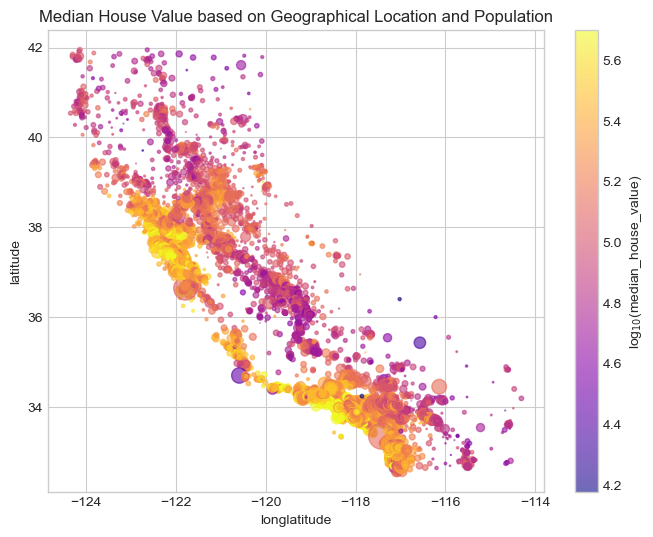

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'],df['latitude'],c=np.log10(df['median_house_value']),s=df['population']/100,cmap='plasma',alpha=0.6)
plt.axis('equal')
plt.xlabel('longlatitude')
plt.ylabel('latitude');
plt.colorbar(label='log$_{10}$(median_house_value)')
plt.grid('True')
plt.title('Median House Value based on Geographical Location and Population');

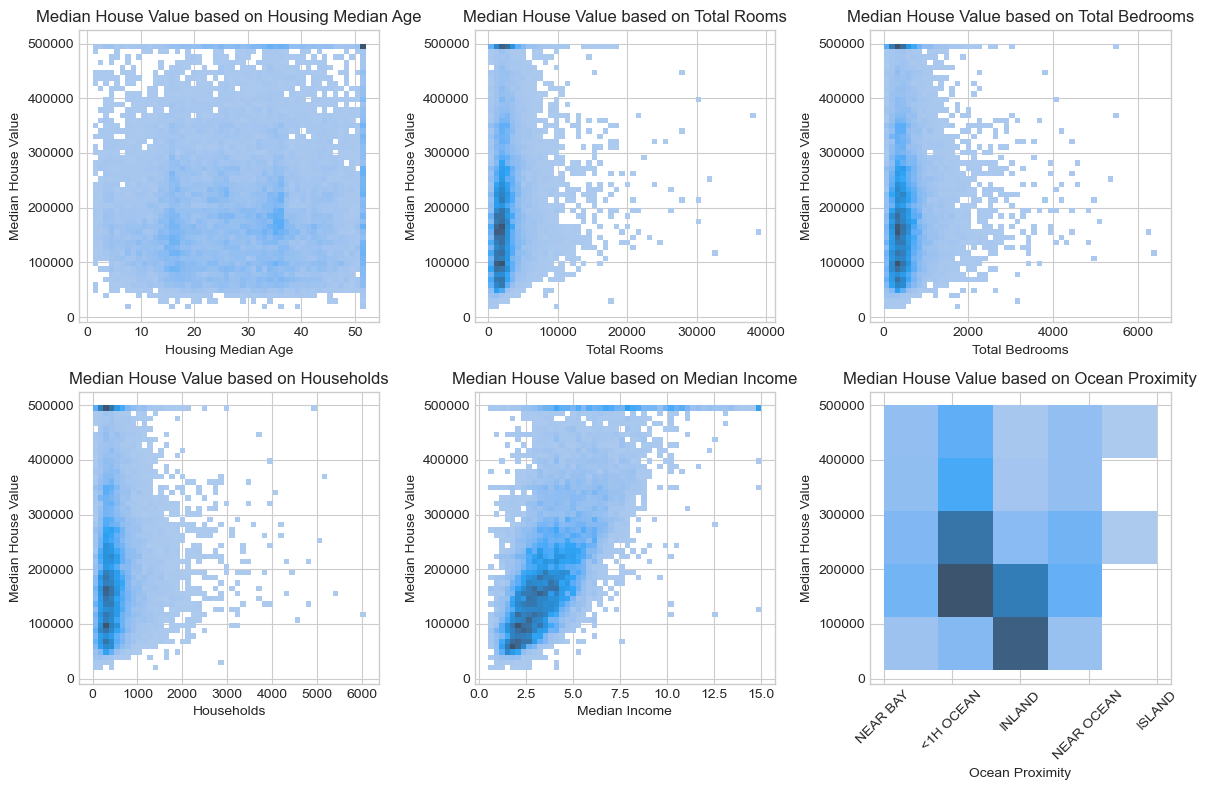

In [10]:

features =['Housing Median Age','Total Rooms','Total Bedrooms','Households','Median Income','Ocean Proximity']
pos = ['NEAR BAY','<1H OCEAN','INLAND','NEAR OCEAN','ISLAND']
fig, ax = plt.subplots(nrows = 2, ncols= 3,figsize=(12,8))
for r in range(2):
    for c in range(3):
        index = r*3 + c
        feature = features[index]
        bins = 50
        if feature == 'Ocean Proximity' : 
            bins = 5
            ax[r,c].set_xticks([1,2,3,4,5])
            ax[r,c].set_xticklabels(pos,rotation= 45)
        sns.histplot(x=df_plot.iloc[:,2+index],y=df['median_house_value'],bins=bins,ax=ax[r,c])
        ax[r,c].set_xlabel(feature)
        ax[r,c].set_ylabel('Median House Value')
        ax[r,c].set(title=(f'Median House Value based on {feature}'))
plt.tight_layout()
plt.show()

## **4. Feature Engineering**

In [11]:
df['rooms_per_household'] = df['total_rooms'] /df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df['rooms_per_person'] = df['total_rooms'] / df['population']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['bedroom_to_income_ratio'] = df['total_bedrooms'] / df['median_income']

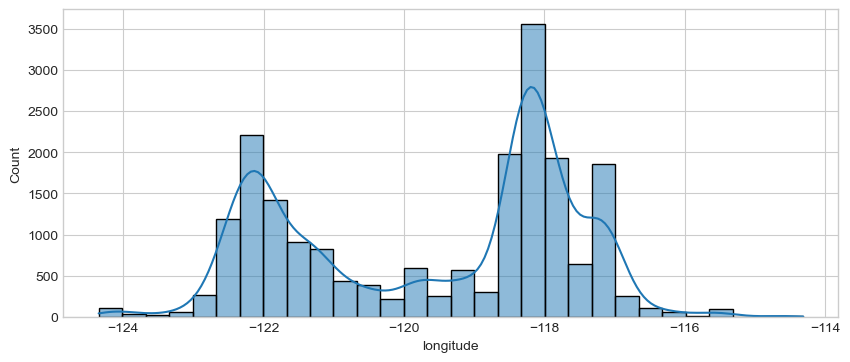

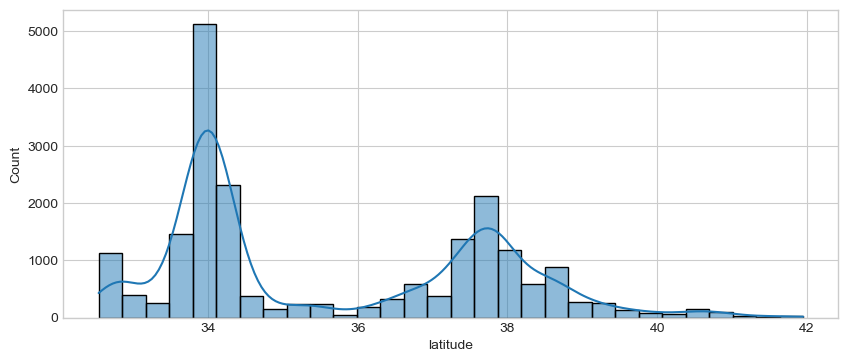

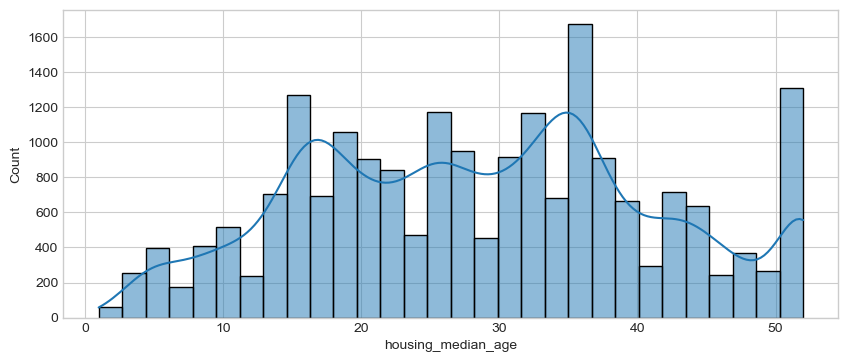

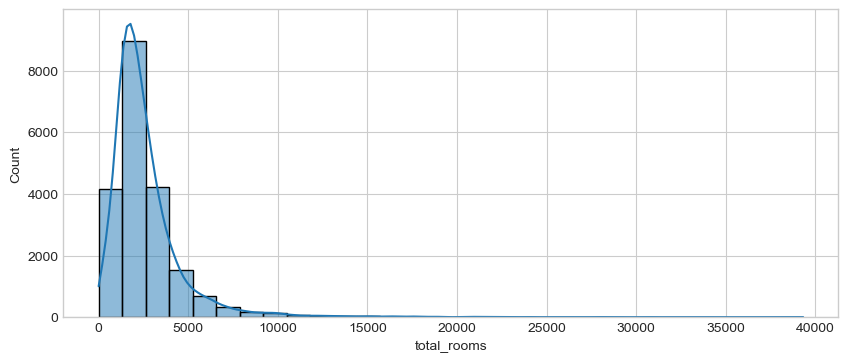

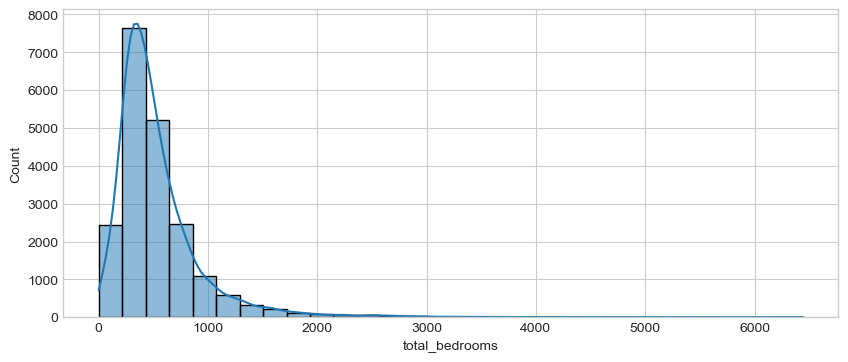

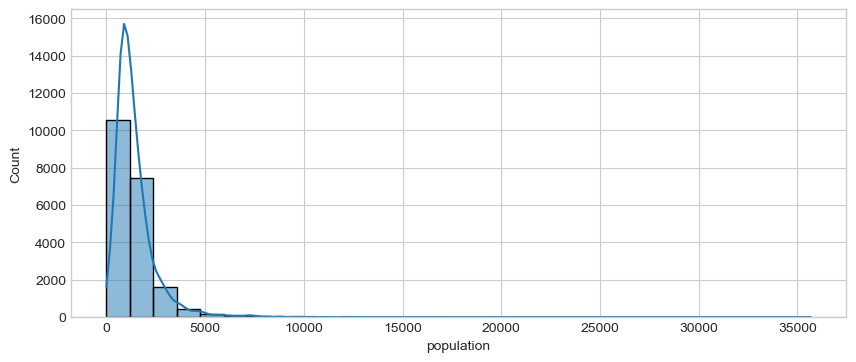

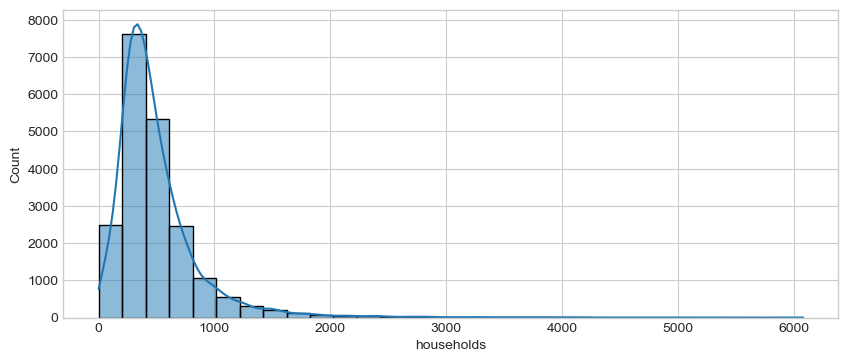

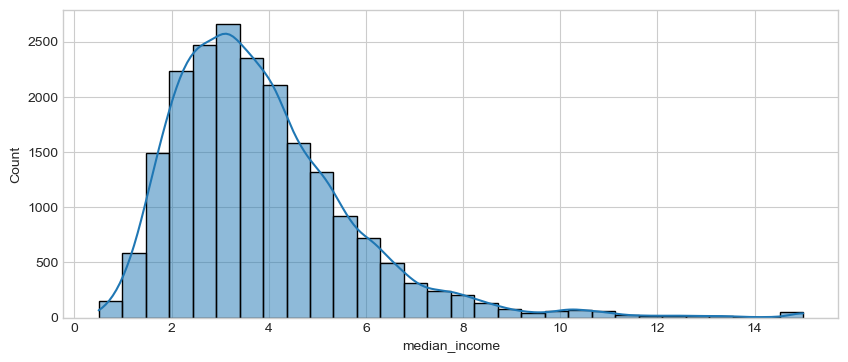

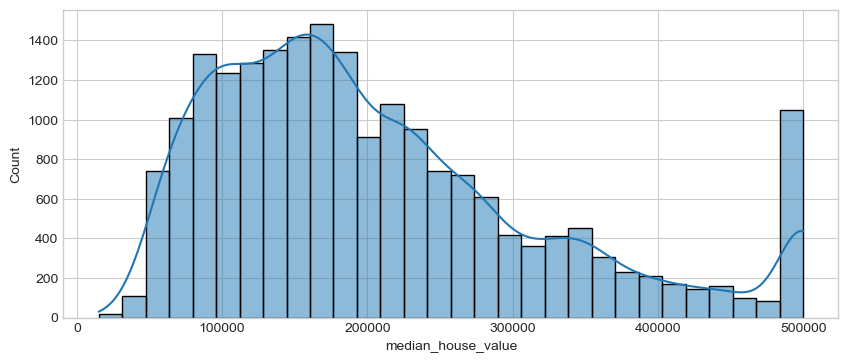

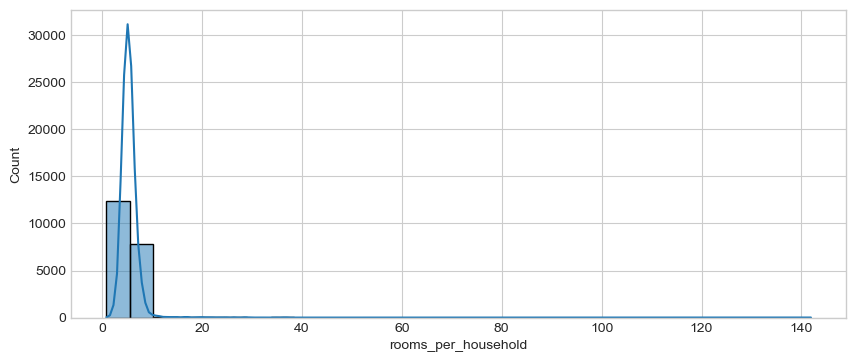

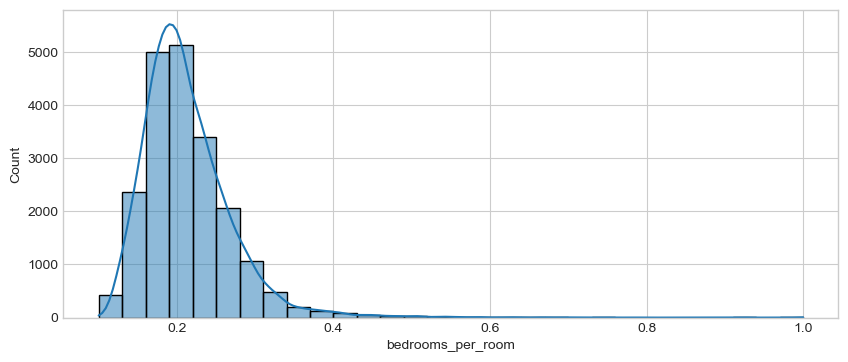

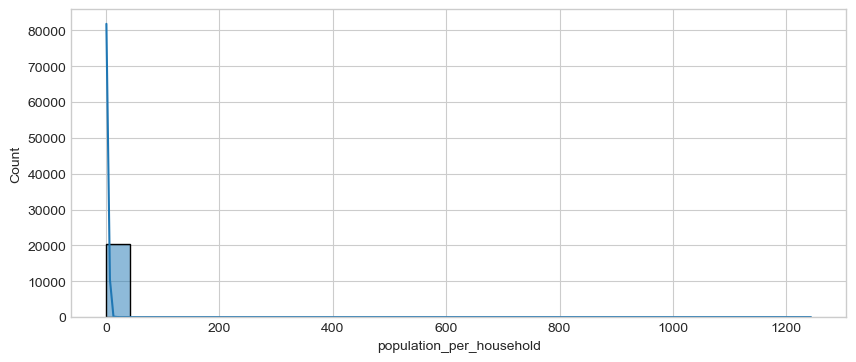

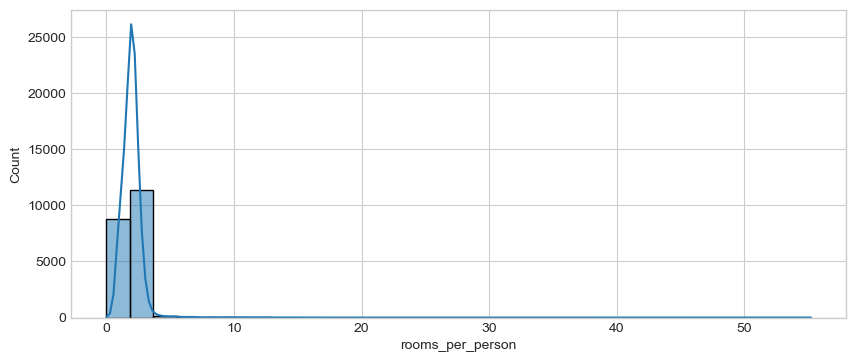

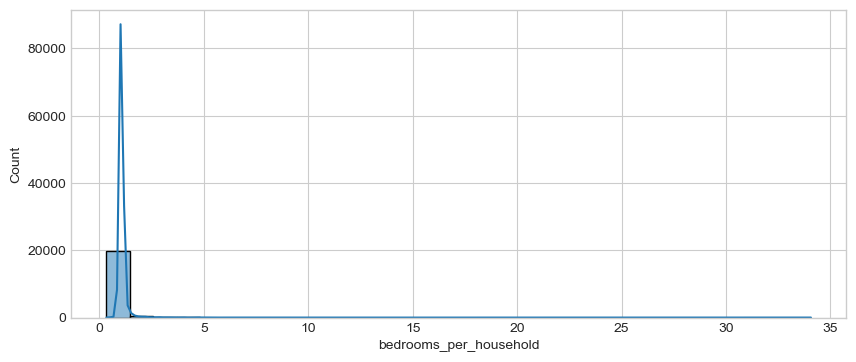

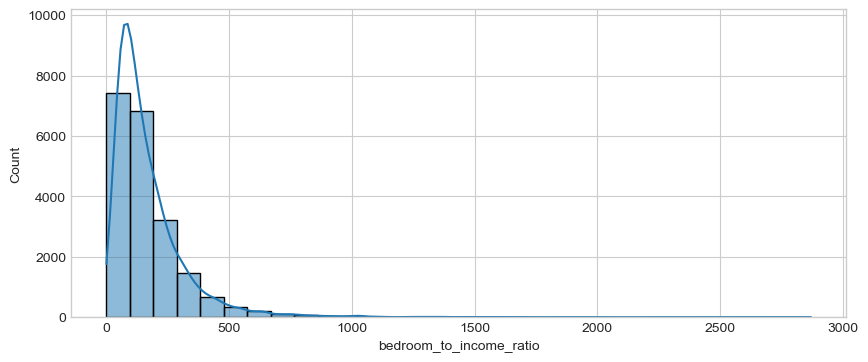

In [12]:
from scipy.stats import skew, kurtosis
feature_stats = {}
fix_features = []
for col in df.columns:
    if 'ocean_proximity' in col:
        continue
    x = df[col]
    sk = skew(x)
    kur = kurtosis(x)
    feature_stats[col] = (sk,kur)
    plt.figure(figsize = (10, 4))
    sns.histplot(x, kde=True, bins = 30)
    plt.xlabel(col)
    plt.show()
    if sk > 0.5 or sk < -0.5:
        fix_features.append(col)
        continue
    if kur > 3.5 or kur < 2.5:
        fix_features.append(col)
        continue

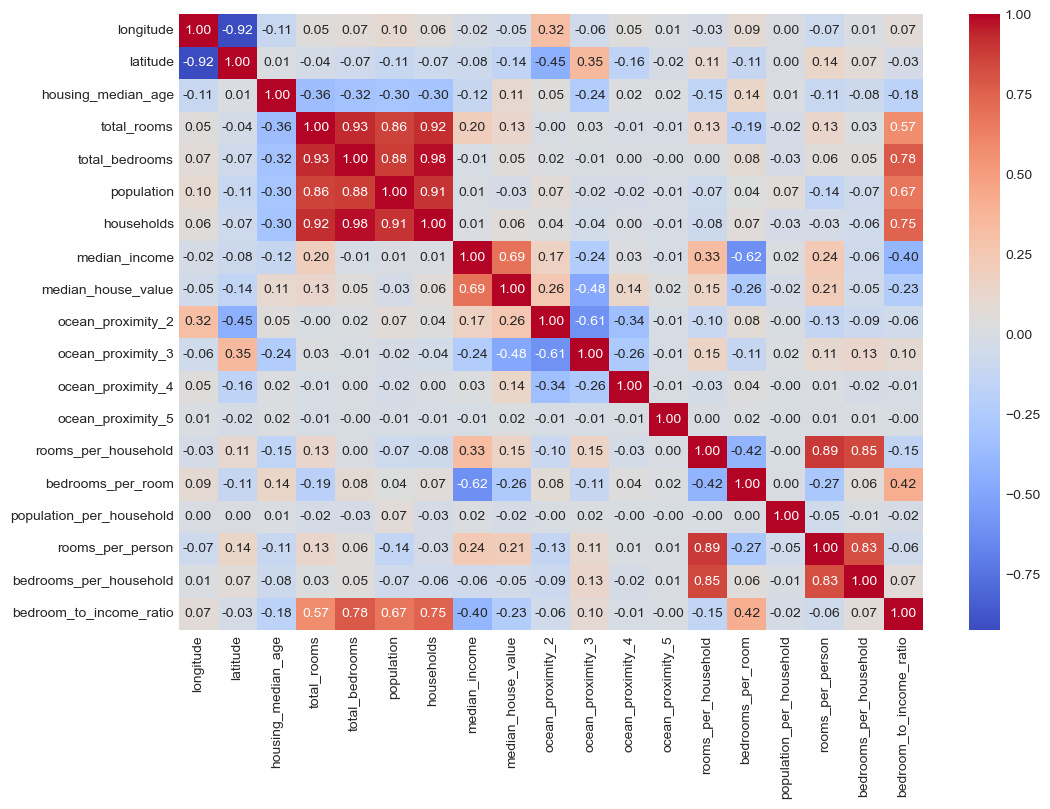

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f');

## **5. Data Wrangling**

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1 # distance between Q3 and Q1

    #lower and upper bound
    lb = Q1 - 1.5*IQR
    ub = Q3 + 1.5*IQR

    filtered_df = df[(df[feature]>=lb) & (df[feature]<=ub)]
    return filtered_df

for key,value in feature_stats.items():
    sk = abs(value[0])
    kur = value[1]
    if sk>5: df[key] = np.log1p(df[key])
    elif sk>3: df[key] = df[key]**0.3
    elif sk>1: df[key] = np.sqrt(df[key])

    if kur > 5:
        df = remove_outliers_iqr(df, key)
    elif kur < -5:
        scaler = StandardScaler()
        df[key] = scaler.fit(df[key])


In [15]:
X = df.drop(columns='median_house_value')
Y = df['median_house_value']

## **6. Model Training**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size=0.2,random_state=42)  
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [17]:
lr_model.score(x_val,y_val)

0.7302168435276584

In [18]:
def evaluate_model(model, x_val, y_val):
    y_pred = model.predict(x_val)

    mae = mean_absolute_error(y_val, y_pred)

    mse = mean_squared_error(y_val, y_pred)

    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

    r2 = r2_score(y_val, y_pred)

    print(f"{model.__class__.__name__}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - MSE: {mse:.4f}")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - MAPE: {mape:.2f}%") 

evaluate_model(lr_model, x_val, y_val)

LinearRegression
  - MAE: 44955.6813
  - MSE: 3584045612.4275
  - R² Score: 0.7302
  - MAPE: 26.82%
